In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [2]:

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

In [3]:
data_dir = pathlib.Path(data_dir)

In [4]:
data_dir

WindowsPath('C:/Users/Admin/.keras/datasets/flower_photos')

In [5]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
os.listdir(data_dir)


['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [8]:
tulips = len(os.listdir('C://Users//admin//.keras//datasets//flower_photos//tulips'))

In [9]:
tulips

799

In [10]:
daisy = len(os.listdir('C://Users//admin//.keras//datasets//flower_photos//daisy'))

In [11]:
daisy

633

In [12]:
dandelion = len(os.listdir('C://Users//admin//.keras//datasets//flower_photos//dandelion'))

In [13]:
dandelion

898

In [14]:
roses = len(os.listdir('C://Users//admin//.keras//datasets//flower_photos//roses'))

In [15]:
roses

641

In [16]:
sunflowers = len(os.listdir('C://Users//admin//.keras//datasets//flower_photos//sunflowers'))

In [17]:
sunflowers

699

In [18]:
tulips+daisy+dandelion+sunflowers+roses

3670

In [19]:
roses = list(data_dir.glob('roses/*'))
roses

[WindowsPath('C:/Users/Admin/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/Admin/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/Admin/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/Admin/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/Admin/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/Admin/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/Admin/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/Admin/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/Admin/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/Admin/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Users/Admin/.keras/data

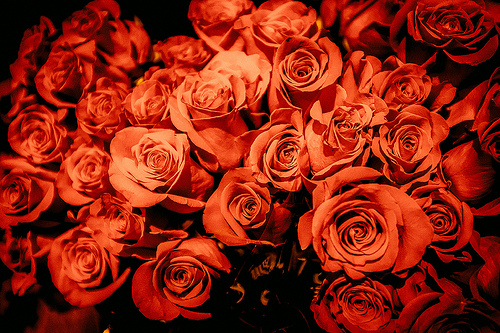

In [20]:
PIL.Image.open(str(roses[2]))

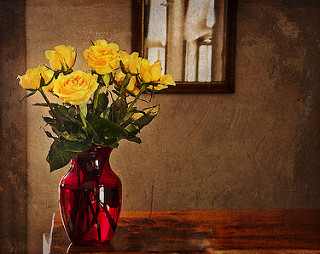

In [21]:
roses1 = image.load_img('C:/Users/admin/.keras/datasets/flower_photos/roses/12243069253_e512464095_n.jpg')
roses1

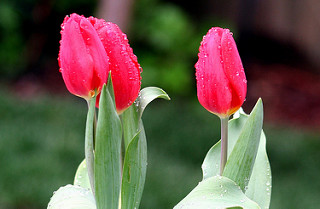

In [22]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [23]:
batch_size = 64
epochs = 10
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [24]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2)

In [25]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training')

Found 2939 images belonging to 5 classes.


In [26]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [27]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [28]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 731 images belonging to 5 classes.


In [29]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [30]:
sample_images,labels = next(train_data_gen)

In [31]:

sample_images.shape

(64, 224, 224, 3)

In [32]:
labels

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0.

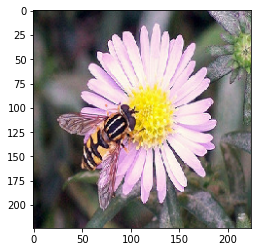

In [33]:
plt.imshow(sample_images[0])

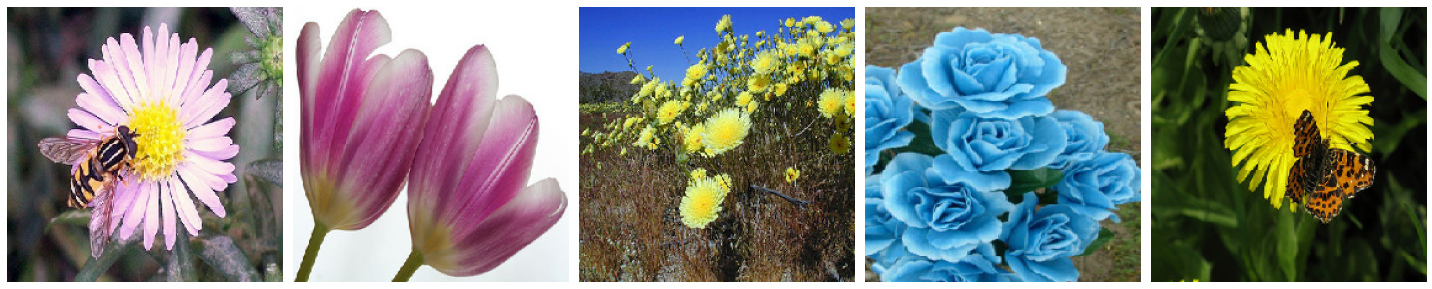

In [34]:
plotImages(sample_images[0:5])

In [35]:
IMAGE_SIZE = [224,224]

In [36]:
incep = InceptionV3(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

In [37]:
incep.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [38]:
for layer in incep.layers:
    layer.trainable = False

In [39]:
x = Flatten()(incep.output)
prediction = Dense(5,activation='softmax')(x)

In [40]:
model = Model(inputs=incep.input,outputs=prediction)

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [42]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
history = model.fit(train_data_gen,
                             validation_data=val_data_gen,
                             epochs=epochs)

Epoch 1/10
46/46 [==============================] - 310s 7s/step - loss: 2.8486 - accuracy: 0.6849 - val_loss: 1.3883 - val_accuracy: 0.8153
Epoch 2/10
46/46 [==============================] - 396s 9s/step - loss: 0.3993 - accuracy: 0.9217 - val_loss: 1.3971 - val_accuracy: 0.7866
Epoch 3/10
46/46 [==============================] - 488s 11s/step - loss: 0.1466 - accuracy: 0.9554 - val_loss: 1.2027 - val_accuracy: 0.8317
Epoch 4/10
46/46 [==============================] - 515s 11s/step - loss: 0.0466 - accuracy: 0.9843 - val_loss: 1.0234 - val_accuracy: 0.8386
Epoch 5/10
46/46 [==============================] - 519s 11s/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.9291 - val_accuracy: 0.8399
Epoch 6/10
46/46 [==============================] - 498s 11s/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.9573 - val_accuracy: 0.8304
Epoch 7/10
46/46 [==============================] - 439s 10s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.9524 - val_accuracy: 0.8263
Epoch 8/

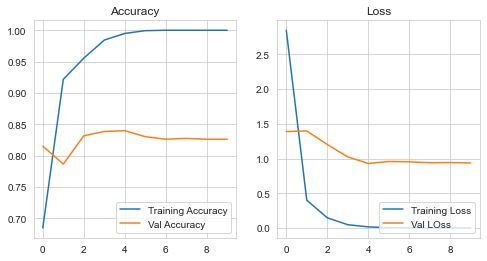

In [44]:
import seaborn as sns
sns.set_style('whitegrid')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='lower right')
plt.title('Loss')
plt.show()

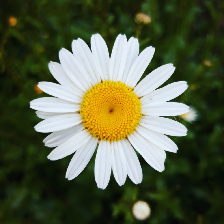

In [45]:
daisy1 = image.load_img('photo-1592339078319-1f8cc9d67888.jpg',target_size=(224,224))
daisy1

In [46]:
test_array = image.img_to_array(daisy1)

In [47]:
test_array.shape

(224, 224, 3)

In [48]:
test_array = test_array.reshape(1,224, 224, 3)

In [49]:
test_array.shape

(1, 224, 224, 3)

In [50]:
model.predict(test_array)

array([[0.18406065, 0.        , 0.        , 0.        , 0.81593937]],
      dtype=float32)

In [51]:
model.predict(test_array).round()

array([[0., 0., 0., 0., 1.]], dtype=float32)